# Markov Chain

In [1]:
import pandas as pd
import numpy as np
import helper_functions as hf
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook as tqdm
import pickle
import matplotlib.pyplot as plt

%matplotlib inline

from markovchain import MarkovChain

### Loading cowrie attack logs 

In [2]:
cow_1 = pd.read_json('input/cowrie.json.2017_7_4', lines=True)
cow_3 = pd.read_json('input/cowrie.json.2017_7_6', lines=True)
cow_4 = pd.read_json('input/cowrie.json.2017_7_7', lines=True)

# k,le = hf.process_data(cow_1,cow_3,cow_4)

Data Shape : (1058090, 30)


,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,...,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width
0,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,...,NaN,116.31.116.16,39547.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:07.569246,NaN,NaN,NaN,NaN,NaN
1,[none],NaN,NaN,NaN,NaN,"[aes128-ctr, aes192-ctr, aes256-ctr, aes256-cb...",cowrie.client.version,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:08.235671,NaN,NaN,NaN,SSH-2.0-PUTTY,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.login.success,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,SSHService 'ssh-userauth' on HoneyPotSSHTransp...,2017-07-03 18:30:10.585142,NaN,NaN,root,NaN,NaN
3,NaN,NaN,NaN,NaN,9.96463,NaN,cowrie.session.closed,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:17.902600,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,...,NaN,116.31.116.16,22040.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:44.657703,NaN,NaN,NaN,NaN,NaN


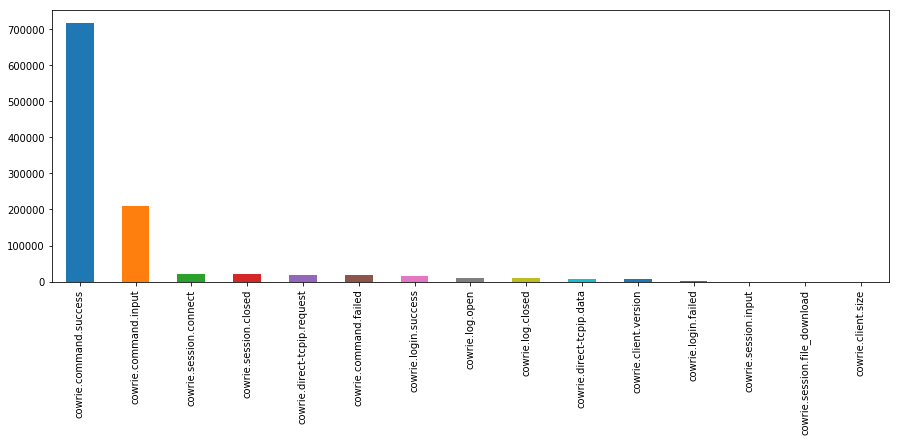

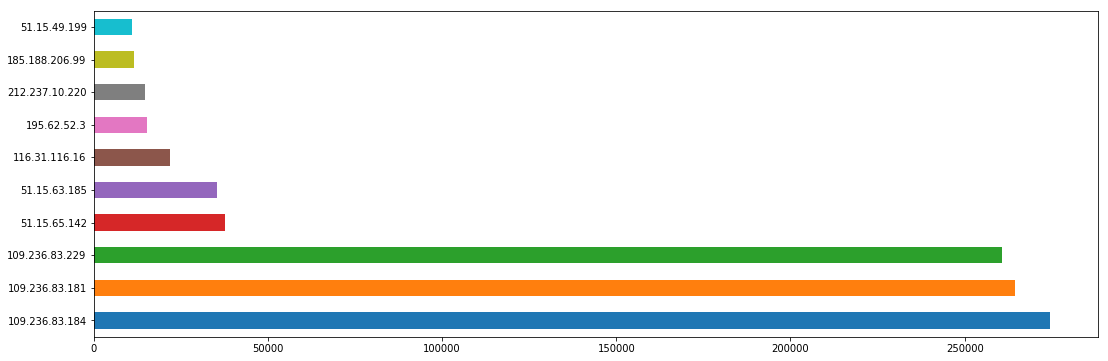

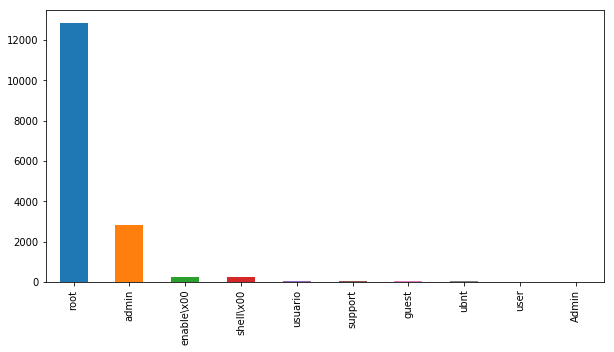

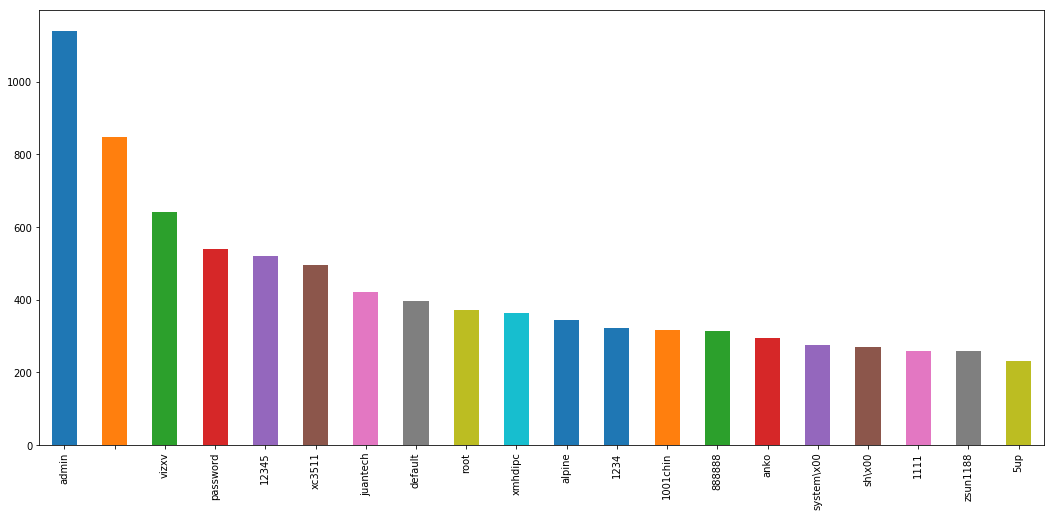

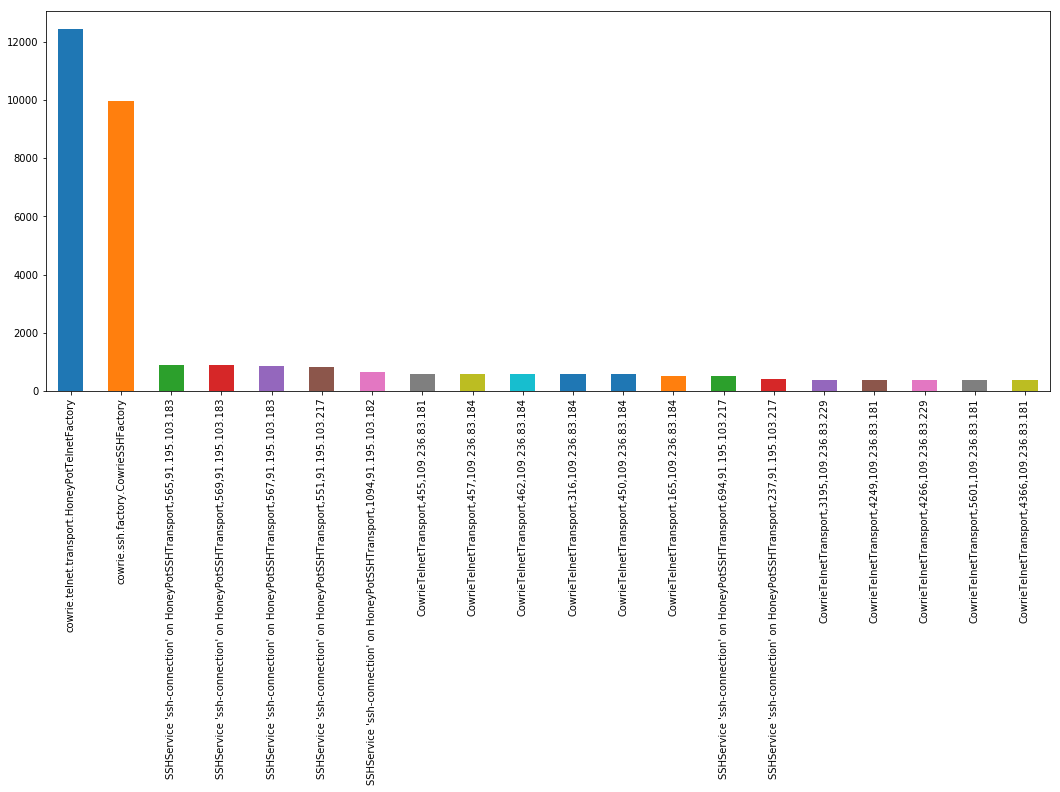

In [3]:
hf.vis(cow_1,cow_3,cow_4)

In [4]:
k = hf.load_pickle('input/seq_events.txt')

pickle loading complete


In [5]:
hf.sample_per_seq(k, 2000)

Top maximum number of sequence length: 

    length  no of samples
0      2.0         5237.0
1      4.0         4959.0
2    199.0         3032.0
3      5.0         1903.0
4      3.0         1481.0
5     71.0          659.0
6     31.0          637.0
7    129.0          625.0
8      6.0          549.0
9     23.0          482.0
10   194.0          443.0
11   197.0          418.0
12    15.0          326.0
13    19.0          306.0
14    69.0          188.0
15    26.0          119.0
16     7.0          114.0
17    16.0          112.0
18    11.0           65.0
19    13.0           65.0


In [6]:
length = 7
data = hf.desired_seq(k, length)

HBox(children=(IntProgress(value=0, max=22449), HTML(value='')))


total samples found: 114

few samples of data of sequence length 7
[[16  1 14 10 10  9 15]
 [16  1 14  0 12 11 15]
 [16  1 14 10 10  9 15]
 [16  1 14  0 12 11 15]
 [16  1 14  0 12 11 15]]


In [7]:
mod = MarkovChain(states=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [8]:
mod.train(k)

In [9]:
mod.get_probability([16, 1, 14])

0.25082964115440604

In [10]:
mod.transition[3][4]

0.00901770317518075

In [11]:
mod.next_state([12, 1, 10])

10

In [12]:
mod.next_possible_states([12])

([3, 4, 6, 7, 11],
 [0.844379804695616,
  0.0011427384167878663,
  0.0006233118637024725,
  0.00031165593185123624,
  0.15354248909204238])

In [16]:
mod.most_probable_sequence(start=16, length=7)

[16, 14, 12, 3, 8, 8, 8]

In [17]:
mod.gen_random_seq(start=16, length=10)

[16, 15, 16, 1, 15, 16, 1, 15, 16, 1]

In [18]:
mod.transition[16][1]

0.3245030154121063